# <center>STUDENT AT PARIS SACLAY OCTOBER 2020</center>#
# <center> Programming Project Document Similarity</center>#
#  NAMES: AIT ETTAJER Haytham #


In [1]:
import nltk
import numpy as np
import pandas as pd
from copy import deepcopy
from random import shuffle
from datetime import datetime
import matplotlib.pyplot as plt

# define extra parameter

In [2]:
# use this variable for the tokenize the text
tokenizer = nltk.RegexpTokenizer(r'\w+')

# name File Text
name_file_text = "tweets.txt"

# the threshold value
threshold_simmilarity = 0.05

# the number of permutation function
number_hash_function = 10

# the number of bande 
number_of_bande = 5

# the size of shingle
size_shingle = 5

%matplotlib inline

# load data

In [3]:
# the list containing each line of the doc
array_data = list()

# open the file and build the list
file1 = open(name_file_text,"r")
for i in file1.readlines():
    array_data.append(i.split("\r\n")[0])
file1.close() 

# creation of a dataframe containing the text
data_frame_text_1 = pd.DataFrame(data=array_data, columns=['Text_line'])

# compute the execution time

In [4]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    """This function compute the execution time of algorithm"""
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        #print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

    return thour, tmin, round(tsec, 2)


# Define the Jaccard similarity

In [5]:
def jaccard_similarity(text_1, text_2):
    """This function take two list of word and return the jaccard similarity"""
    
    text_1_inter_text_2 = 0
    
    for i in text_1:
        if i in text_2:
            text_1_inter_text_2+=1
            
    return float(text_1_inter_text_2)/float(len(text_1)+len(text_2)-text_1_inter_text_2)

# Define the other version of Jaccard similarity

In [6]:
def jaccard_similarity_(kkkk, s1,s2):
    """Another version of jaccard similarity"""
    
    valeur = 0
    
    for kj in range(len(kkkk)):
        if(kkkk[kj][s1] == kkkk[kj][s2]):
            valeur+=1
    
    return valeur

# Preprocessing data

In [7]:
def preprocessing_doc(array_data):
    """We use this function for build a dictionary where the keys is the ids of document and the values is the 
    texts"""
    
    # define a dictionnary that the function will return 
    dictionnary_doc_1 = dict()
    
    #tokekenize the doc
    for i in range(len(array_data)):
        array_text_tokenize = tokenizer.tokenize(array_data[i].lower())
        text = ""
        for k in array_text_tokenize:
            text+=k
        
        dictionnary_doc_1[i]=text
        
    return dictionnary_doc_1

# Define the k shingling function

In [8]:
def k_shingling_caractere(dictionnary_doc, size_k):
    """This function take a dictionary where the keys are the ids of docs and the values 
    are the texts containing the essential words of the document. The second parameter is
    the length of shingling"""
    
    shingling = dict()
    
    key = 0
    for i in dictionnary_doc:
        kkkk = list()
        text = dictionnary_doc[i]
        
        if(len(text)>=size_k):
            j = 0;
            
            while(j+size_k < len(text)):
                kkk = ""
                for k in range(j, j+size_k):
                    kkk+=text[k]
                j+=1
                kkkk.append(kkk)
            
            kkk = ""
            for k in range(j, len(text)):
                kkk+=text[k]
            kkkk.append(kkk)
            
            shingling[key]=kkkk
            key+=1
        else:
            kkk = ""
            for k in range(len(text)):
                kkk+=text[k]
            kkkk.append(kkk)
            shingling[key]=kkkk
            key+=1
            
    
    # the dictionnary will contain all different k-shingle
    shingle_hash = list()
    
    # building the shingle_hash
    k = 0
    for i in shingling:
        for j in shingling[i]:
            if j not in shingle_hash:
                shingle_hash.append(j)
            
    return shingling, shingle_hash

# Build the min hashing matrix

In [9]:
def build_min_hashing_matrix(dictionnary_doc, shingle_hash, permutation_functions):
    """this function is used to build the signature matrix"""
    
    signature_matrix = dict()
 
    for k in range(len(permutation_functions)):
        value_row = list()

        #--------------------------------------------
        for i in dictionnary_doc:
            for j in permutation_functions[k]:
                if(j in dictionnary_doc[i]):
                    value_row.append(j)
                    break
        #--------------------------------------------            
        
        signature_matrix[k] = value_row
        
    return signature_matrix

# Build the similarity matrix

In [10]:
def build_similarity_matrix(signature_matrix):
    """This function take minhashing matrix and return the signature matrix"""
    
    similarity_matrix = dict()
    
    
    for i in range(len(signature_matrix[0])-1):
        
        array_tampon = list()
        
        for j in range(len(signature_matrix[0])):
            array_tampon.append(jaccard_similarity_(signature_matrix, i,j)/number_hash_function)
        
        similarity_matrix[i]=array_tampon
            
    
    return similarity_matrix

# hash bande function

In [11]:
def hash_bande(bande,hashage_function):
    """We use this function to hash a band"""
    
    hash_bande = list()
    
    for i in range(len(bande[0])):
        array_test = list()
        for j in range(len(bande)):
            array_test.append(bande[j][i])
        
        for k in hashage_function:
            if k in array_test:
                hash_bande.append(k)
                break
                
    return hash_bande

# Build the locality sensitive function

In [12]:
def locality_sensitive_hashing(signature_matrix,number_of_bande,shingle_hash):
    """This function constructs the function of Locality sensitive hashing"""
    
    bande_bucket = dict()
    size_bande = 0
        
    locality_sensitive_hashing_matrix = dict()
    
    # we create number_of_bande of permutation function
    hashage_function = dict()
    for i in range(number_of_bande):
        hashage_function[i] = deepcopy(shingle_hash)
        shuffle(hashage_function[i])     
    
    # it is necessary to choose a number_of_bande that divide the number of row of signature_matrix
    if(len(signature_matrix) % number_of_bande != 0):
        print(" number of bande is not a multiple of number of row signature matrix")
        return bande_bucket
    else:
        size_bande = len(signature_matrix)//number_of_bande
        

    for k in range(number_of_bande):
        
        bande_k = dict()
        
        for kj in range(size_bande):
            bande_k[kj] = signature_matrix[k*size_bande+kj]
        
        bande_bucket[k] = hash_bande(bande_k,hashage_function[k])
        
        
        
    for i in range(len(bande_bucket[0])):
        array_test = list()
        for j in range(len(bande_bucket[0])):
            kkp = 0
            for z in range(number_of_bande):
                if(bande_bucket[z][i] == bande_bucket[z][j]):
                    kkp+=1

            array_test.append(kkp/number_of_bande)
        
        locality_sensitive_hashing_matrix[i] = array_test
        
    return locality_sensitive_hashing_matrix

# Implementation tests

In [13]:
#dictionnary_doc = preprocessing_document(array_data)
dictionnary_doc_1 = preprocessing_doc(array_data)

In [14]:
for i in dictionnary_doc_1:
    print("id doc = ",i,"  doc = ",dictionnary_doc_1[i])

id doc =  0   doc =  stellargirliloooooooovvvvvveeemykindle2notthatthedxiscoolbutthe2isfantasticinitsownright
id doc =  1   doc =  readingmykindle2loveitleechildsisgoodread
id doc =  2   doc =  okfirstassesmentofthekindle2itfuckingrocks
id doc =  3   doc =  kenburbaryyoullloveyourkindle2ivehadmineforafewmonthsandneverlookedbackthenewbigoneishugenoneedforremorse
id doc =  4   doc =  mikefishfairenoughbutihavethekindle2andithinkitsperfect
id doc =  5   doc =  richardebakernoitistoobigimquitehappywiththekindle2
id doc =  6   doc =  fuckthiseconomyihateaigandtheirnonloangivenasses
id doc =  7   doc =  jqueryismynewbestfriend
id doc =  8   doc =  lovestwitter
id doc =  9   doc =  howcanyounotloveobamahemakesjokesabouthimself
id doc =  10   doc =  checkthisvideooutpresidentobamaatthewhitehousecorrespondentsdinnerhttpbitlyimxum
id doc =  11   doc =  karoliifirmlybelievethatobamapelosihavezerodesiretobecivilitsacharadeandasloganbuttheywanttodestroyconservatism
id doc =  12   doc =  housecorres

In [15]:
# creation of k-shingling
k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, size_shingle)

In [16]:
sike_k_shingling = [i for i in range(100)]
execution_time = list()
number_of_k_shingle_different = list()
for i in sike_k_shingling:
    
    start_time = timer(None)
    k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, i+1)
    
    thour, tmin, tsec = timer(start_time)
    execution_time.append(thour*3600+tmin*60 + tsec)
    number_of_k_shingle_different.append(len(shingle_hash))

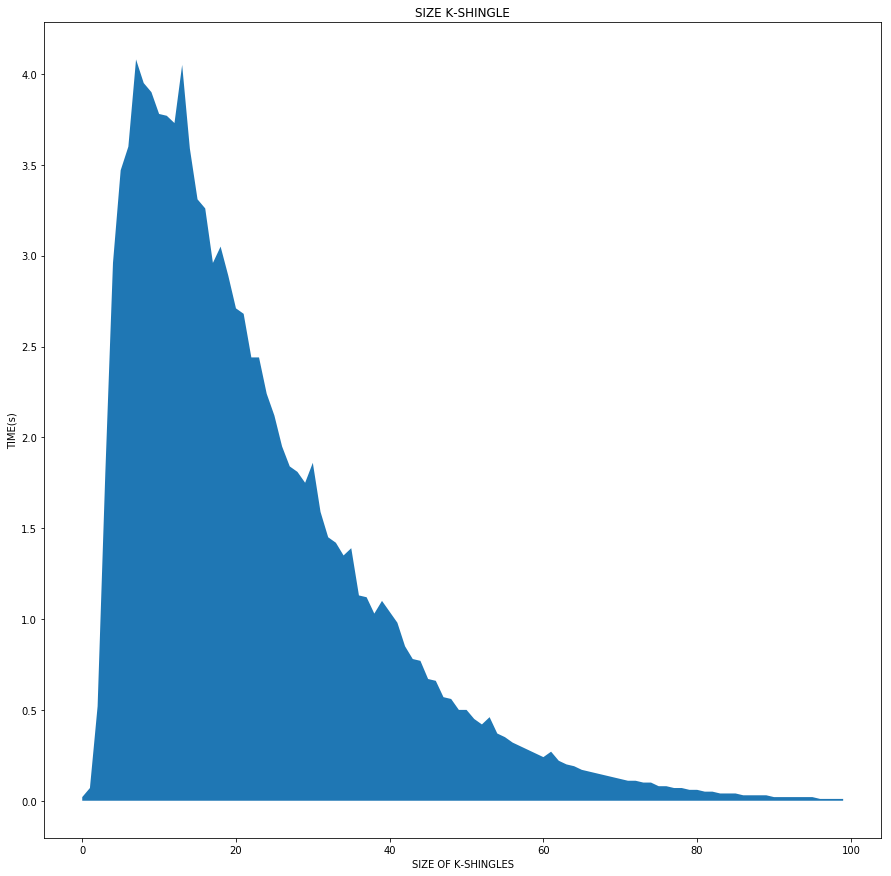

In [17]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIZE OF K-SHINGLES')
plt.ylabel('TIME(s)')
plt.title('SIZE K-SHINGLE')
plt.fill_between(sike_k_shingling, execution_time)
plt.savefig('execution_time.png')
plt.show()

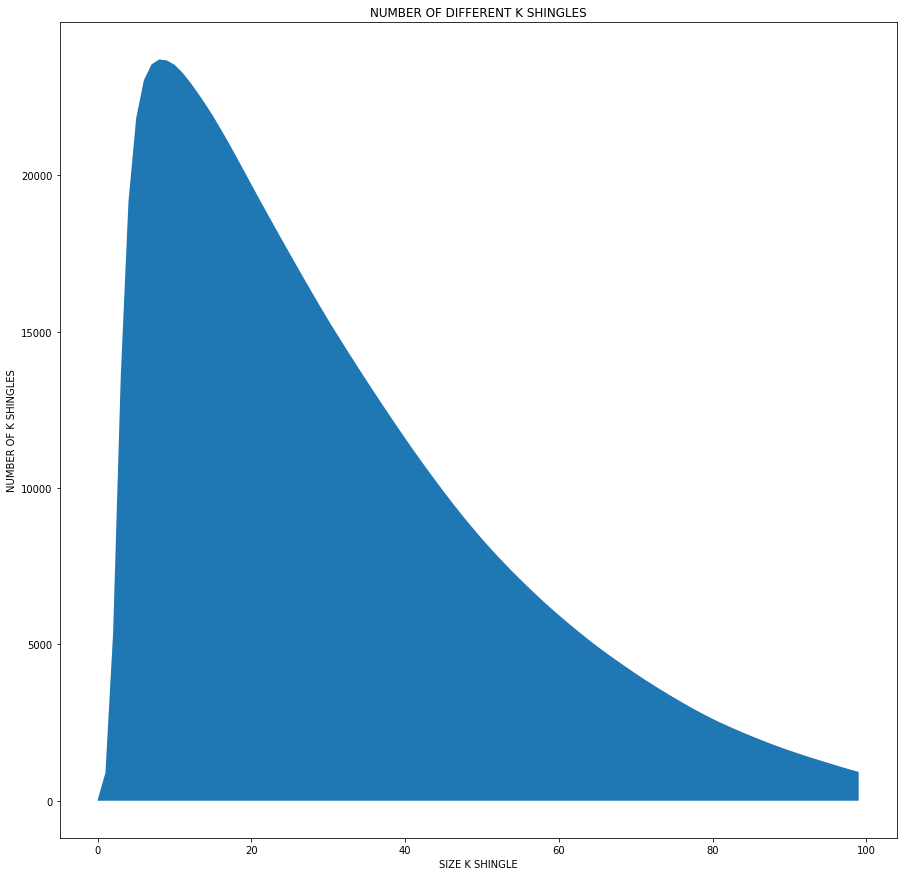

In [18]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIZE K SHINGLE')
plt.ylabel('NUMBER OF K SHINGLES')
plt.title('NUMBER OF DIFFERENT K SHINGLES')
plt.fill_between(sike_k_shingling, number_of_k_shingle_different)
plt.savefig('number_of_k_shingle_different.png')
plt.show()

In [19]:
# creation of k-shingling
k_shingling_carac, shingle_hash = k_shingling_caractere(dictionnary_doc_1, size_shingle)

In [20]:
# we create number_perm of permutation function
permutation_functions = dict()
for i in range(number_hash_function):
    permutation_functions[i] = deepcopy(shingle_hash)
    shuffle(permutation_functions[i]) 

In [21]:
# build the mini hashing matrix
signature_matrix = build_min_hashing_matrix(k_shingling_carac, shingle_hash, permutation_functions)

In [22]:
for i in signature_matrix:
    print("id hash function = ",i,"  resul = ",signature_matrix[i][0:9])

id hash function =  0   resul =  ['icini', 'ldsis', 'irsta', 'afewm', 'butih', 'oitis', 'iseco', 'tfrie', 'witte']
id hash function =  1   resul =  ['dle2n', 'kindl', 'e2itf', 'needf', 'hekin', 'iteha', 'thise', 'mynew', 'twitt']
id hash function =  2   resul =  ['vvvve', 'tleec', 'ofthe', 'needf', 'le2an', 'richa', 'eirno', 'ynewb', 'witte']
id hash function =  3   resul =  ['inits', 'oodre', 'okfir', 'dneve', '2andi', 'harde', 'nomyi', 'tfrie', 'witte']
id hash function =  4   resul =  ['cinit', 'leech', 'ingro', 'lllov', 'sperf', 'gimqu', 'onloa', 'ewbes', 'loves']
id hash function =  5   resul =  ['oovvv', 'ading', 'uckin', 'rremo', 'le2an', 'istoo', 'eirno', 'ryism', 'itter']
id hash function =  6   resul =  ['tthe2', 'child', 'le2it', 'remor', 'enoug', 'ernoi', 'eaiga', 'yismy', 'estwi']
id hash function =  7   resul =  ['inits', 'lovei', 'asses', 'wbigo', 'think', 'oitis', 'asses', 'riend', 'loves']
id hash function =  8   resul =  ['notth', 'sisgo', 'grock', 'yourk', 'tihav', '

In [23]:
#Build the similarity matrix
testest = build_similarity_matrix(signature_matrix)

In [24]:
array_similarity_ = list()
similarity_threshold = [0.01*(i+1) for i in range(100)]

In [25]:
#number_hash_function = 10  and  size_shingle = 5
for kk in similarity_threshold:
    numb_similarity = 0
    for i in range(len(testest[0])-1):
        for j in range(i+1,len(testest[0])):
            if testest[i][j]>kk:
                numb_similarity+=1
    array_similarity_.append(numb_similarity)

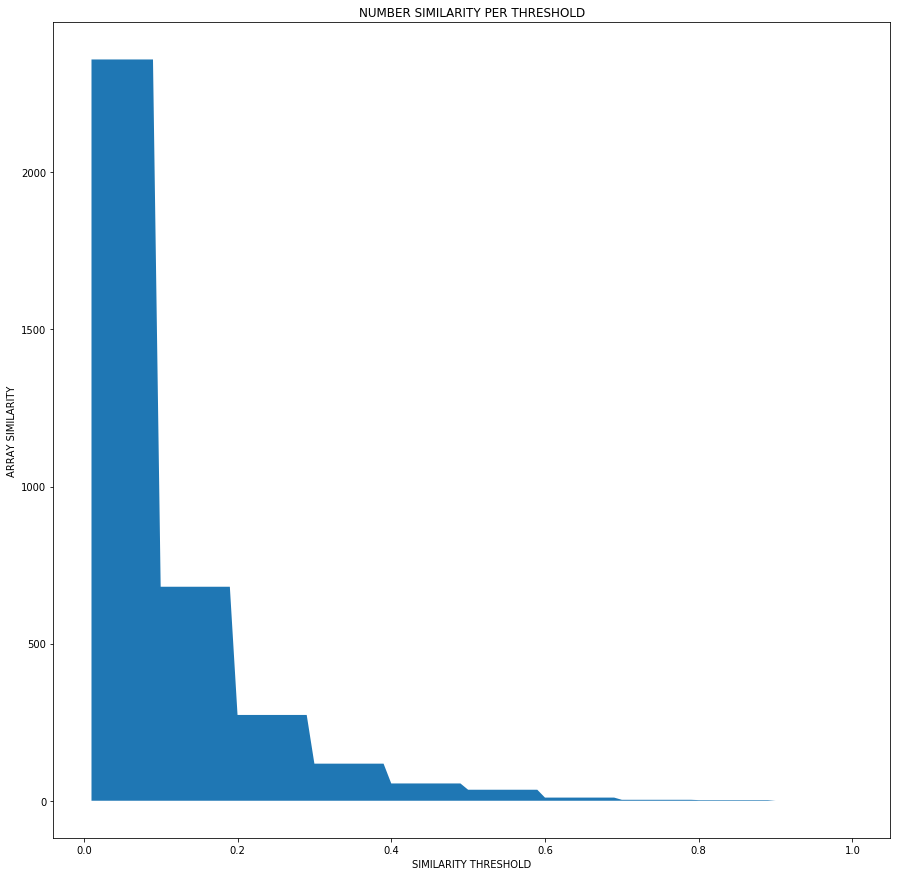

In [26]:
plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIMILARITY THRESHOLD')
plt.ylabel('ARRAY SIMILARITY')
plt.title('NUMBER SIMILARITY PER THRESHOLD')
plt.fill_between(similarity_threshold, array_similarity_)
plt.savefig('number_of_similarity_per_threshold.png')
plt.show()

In [27]:
#Build the locality sensistive hashing matrix
locality_sensitive_hashing_matrix = locality_sensitive_hashing(signature_matrix,number_of_bande,shingle_hash)

In [28]:
array_similarity_ = list()
array__number_locality_sensitive_ = list()
similarity_threshold = [0.01*(i+1) for i in range(100)]

In [29]:
#number_hash_function = 10  and  size_shingle = 5
for kk in similarity_threshold:
    numb_similarity = 0
    number_loclity = 0
    for i in range(len(testest[0])-1):
        for j in range(i+1,len(testest[0])):
            if testest[i][j]>kk:
                numb_similarity+=1
            if(locality_sensitive_hashing_matrix[i][j]>kk):
                number_loclity+=1
                
    array__number_locality_sensitive_.append(number_loclity)
    array_similarity_.append(numb_similarity)

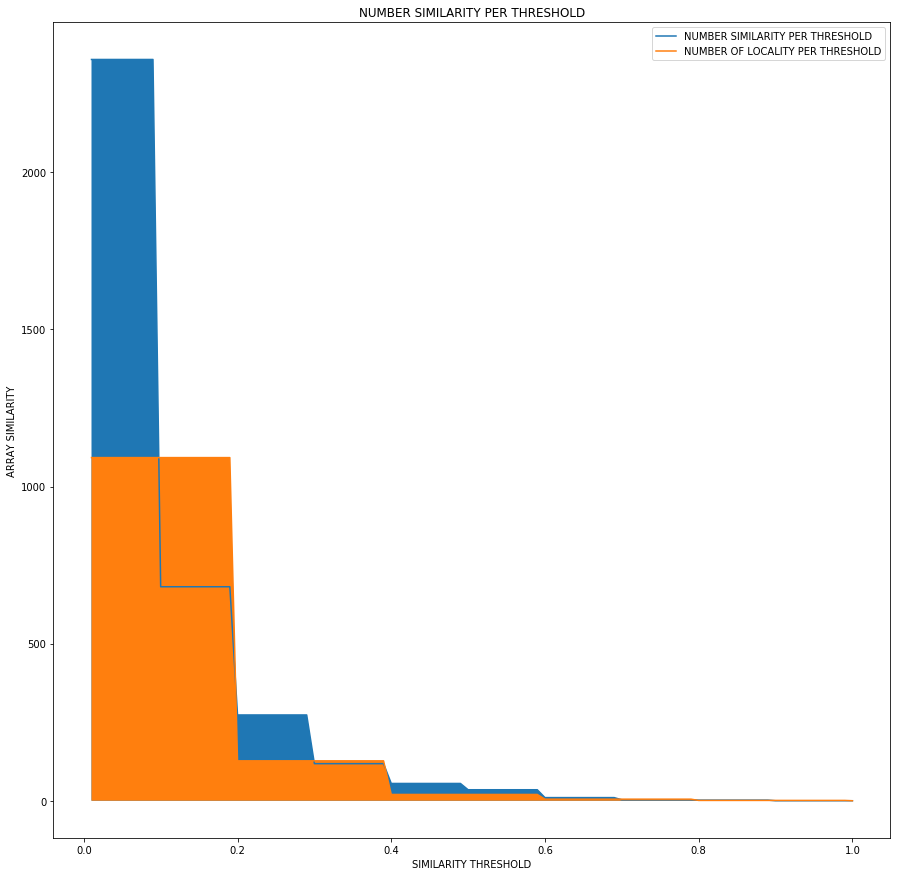

In [30]:
fig = plt.figure(figsize=(15,15))
# Area plot
plt.xlabel('SIMILARITY THRESHOLD')
plt.ylabel('ARRAY SIMILARITY')
plt.title('NUMBER SIMILARITY PER THRESHOLD')
plt.plot(similarity_threshold, array_similarity_, label='NUMBER SIMILARITY PER THRESHOLD')
plt.plot(similarity_threshold, array__number_locality_sensitive_, label='NUMBER OF LOCALITY PER THRESHOLD')
plt.fill_between(similarity_threshold, array_similarity_)
plt.fill_between(similarity_threshold, array__number_locality_sensitive_)
plt.savefig('123.png')
plt.legend(loc='best')
plt.show()

In [31]:
# locality sensitive hashing matrix
for i in range(len(locality_sensitive_hashing_matrix[0])-1):
    for j in range(i+1,len(locality_sensitive_hashing_matrix[0])-i):
        if(locality_sensitive_hashing_matrix[i][j]>0):
            print(i,"  ===  ",j,"  ==  ",locality_sensitive_hashing_matrix[i][j])

2   ===   292   ==   0.2
2   ===   379   ==   0.2
4   ===   49   ==   0.2
4   ===   132   ==   0.2
7   ===   58   ==   0.2
7   ===   237   ==   0.2
7   ===   430   ==   0.2
8   ===   62   ==   0.2
8   ===   300   ==   0.2
8   ===   304   ==   0.2
9   ===   86   ==   0.2
10   ===   12   ==   0.4
10   ===   373   ==   0.2
10   ===   411   ==   0.2
13   ===   17   ==   0.2
13   ===   126   ==   0.2
13   ===   127   ==   0.2
13   ===   128   ==   0.2
13   ===   253   ==   0.2
13   ===   255   ==   0.2
13   ===   372   ==   0.2
16   ===   408   ==   0.2
17   ===   253   ==   0.2
17   ===   255   ==   0.2
19   ===   252   ==   0.4
19   ===   259   ==   0.2
20   ===   85   ==   0.2
20   ===   326   ==   0.2
21   ===   25   ==   0.2
21   ===   51   ==   0.2
21   ===   68   ==   0.2
21   ===   246   ==   0.2
21   ===   312   ==   0.2
21   ===   313   ==   0.4
21   ===   317   ==   0.2
21   ===   349   ==   0.2
21   ===   359   ==   0.2
21   ===   369   ==   0.2
23   ===   30   ==   0.2
23   ===

In [33]:
#number_hash_function = 10  and  size_shingle = 5
for i in range(len(signature_matrix[0])-1):
    for j in range(i+1,len(signature_matrix[0])):
        if jaccard_similarity(k_shingling_carac[i], k_shingling_carac[j])>threshold_simmilarity:
            print(i,"    ",j,"    ",jaccard_similarity(k_shingling_carac[i], k_shingling_carac[j]))

0      238      0.05102040816326531
0      455      0.061068702290076333
1      237      0.125
1      238      0.14285714285714285
1      454      0.07017543859649122
1      455      0.05747126436781609
1      464      0.0847457627118644
1      468      0.05660377358490566
2      4      0.07228915662650602
2      5      0.0759493670886076
2      237      0.057692307692307696
2      238      0.05555555555555555
2      265      0.06722689075630252
2      468      0.05555555555555555
2      469      0.06315789473684211
4      5      0.06521739130434782
4      209      0.05405405405405406
4      265      0.08527131782945736
4      468      0.07692307692307693
4      469      0.05555555555555555
5      469      0.057692307692307696
8      61      0.09375
8      62      0.1875
8      63      0.09375
8      64      0.05172413793103448
8      104      0.06666666666666667
8      105      0.05454545454545454
8      241      0.125
8      242      0.0625
8      300      0.07692307692307693
8      

55      246      0.052083333333333336
55      290      0.14285714285714285
55      291      0.08527131782945736
55      292      0.0990990990990991
55      293      0.07971014492753623
55      294      0.18181818181818182
55      295      0.1134020618556701
55      300      0.060240963855421686
55      310      0.05555555555555555
55      311      0.06097560975609756
55      328      0.053763440860215055
55      335      0.05434782608695652
55      345      0.054945054945054944
55      346      0.05555555555555555
55      351      0.05154639175257732
55      399      0.050505050505050504
55      407      0.07547169811320754
55      411      0.053763440860215055
55      423      0.05747126436781609
55      482      0.06896551724137931
56      57      0.13541666666666666
56      58      0.13414634146341464
56      155      0.09523809523809523
56      156      0.06289308176100629
56      157      0.06535947712418301
56      193      0.062111801242236024
56      247      0.1020408163265306

104      105      0.06
104      234      0.05844155844155844
104      241      0.08695652173913043
104      242      0.06451612903225806
104      300      0.07142857142857142
104      301      0.08571428571428572
104      302      0.06349206349206349
104      303      0.09523809523809523
104      304      0.08108108108108109
104      305      0.08
104      387      0.061855670103092786
104      485      0.07608695652173914
105      300      0.07692307692307693
105      301      0.09375
105      303      0.10526315789473684
105      304      0.08823529411764706
105      305      0.08695652173913043
106      201      0.055944055944055944
106      240      0.05102040816326531
106      266      0.06206896551724138
106      348      0.09009009009009009
106      446      0.05343511450381679
106      482      0.05504587155963303
107      348      0.5272727272727272
108      109      0.1590909090909091
108      110      0.1320754716981132
108      111      0.24242424242424243
108      350     

136      361      0.1111111111111111
136      362      0.15384615384615385
136      363      0.15584415584415584
136      364      0.08108108108108109
136      365      0.1348314606741573
136      366      0.11538461538461539
136      367      0.09523809523809523
136      368      0.13953488372093023
136      369      0.12612612612612611
136      370      0.10810810810810811
136      371      0.125
136      372      0.12
137      261      0.06179775280898876
141      143      0.05172413793103448
141      144      0.125
141      145      0.06862745098039216
141      146      0.06060606060606061
141      147      0.08695652173913043
141      150      0.09333333333333334
141      151      0.09090909090909091
141      152      0.09649122807017543
141      153      0.102803738317757
141      154      0.12643678160919541
141      211      0.09565217391304348
141      212      0.05660377358490566
141      214      0.06315789473684211
141      387      0.07692307692307693
141      388      0.0

156      492      0.05813953488372093
157      247      0.08088235294117647
157      248      0.050505050505050504
157      274      0.05405405405405406
157      320      0.06097560975609756
157      324      0.060240963855421686
157      375      0.0684931506849315
157      377      0.05154639175257732
157      401      0.07692307692307693
157      415      0.0684931506849315
157      416      0.05102040816326531
157      424      0.06918238993710692
157      443      0.052083333333333336
157      448      0.057803468208092484
157      492      0.060240963855421686
158      201      0.0625
158      232      0.06666666666666667
160      171      0.058823529411764705
160      183      0.056179775280898875
160      232      0.05434782608695652
160      233      0.056179775280898875
160      240      0.07246376811594203
160      246      0.056179775280898875
160      269      0.09782608695652174
160      294      0.05434782608695652
160      300      0.06578947368421052
160      311      

197      439      0.07692307692307693
197      440      0.06666666666666667
197      441      0.0625
197      444      0.057692307692307696
197      445      0.075
197      446      0.061224489795918366
198      269      0.053691275167785234
200      201      0.08333333333333333
200      349      0.06086956521739131
200      440      0.08695652173913043
200      441      0.11650485436893204
200      445      0.07608695652173914
201      232      0.06837606837606838
201      240      0.05154639175257732
201      440      0.1328125
201      441      0.16379310344827586
201      442      0.05357142857142857
201      446      0.10483870967741936
202      203      0.050955414012738856
202      204      0.09090909090909091
202      447      0.058394160583941604
202      448      0.05925925925925926
202      449      0.08108108108108109
202      450      0.06451612903225806
203      204      0.061068702290076333
203      205      0.055
203      448      0.05084745762711865
203      449      0

262      300      0.054945054945054944
262      311      0.05555555555555555
262      345      0.050505050505050504
262      346      0.061855670103092786
262      423      0.05263157894736842
262      429      0.05217391304347826
262      482      0.052083333333333336
265      454      0.06748466257668712
265      455      0.09090909090909091
265      464      0.06422018348623854
265      468      0.058823529411764705
265      469      0.05555555555555555
266      328      0.05172413793103448
266      345      0.05263157894736842
266      465      0.0718562874251497
267      319      0.08695652173913043
267      379      0.06481481481481481
268      318      0.1744186046511628
269      294      0.050505050505050504
269      300      0.060240963855421686
269      311      0.06097560975609756
269      328      0.053763440860215055
269      335      0.05434782608695652
269      345      0.054945054945054944
269      346      0.05555555555555555
269      351      0.0625
269      399      

349      359      0.05357142857142857
350      351      0.0948905109489051
350      352      0.0896551724137931
351      352      0.14285714285714285
351      399      0.053763440860215055
351      411      0.05747126436781609
351      423      0.06172839506172839
351      482      0.06097560975609756
353      354      0.1588785046728972
357      358      0.05714285714285714
357      420      0.05747126436781609
361      362      0.15789473684210525
361      363      0.16
361      364      0.0821917808219178
361      365      0.13793103448275862
361      366      0.11764705882352941
361      367      0.0967741935483871
361      368      0.14285714285714285
361      369      0.10810810810810811
361      370      0.11009174311926606
361      371      0.1276595744680851
361      372      0.13402061855670103
362      363      0.26666666666666666
362      364      0.11304347826086956
362      365      0.21052631578947367
362      366      0.18309859154929578
362      367      0.127659574468